## Handwritten Digit Recognition system using MNIST

### Problem Statement:

To build a machine learning model that recognise the Handwritten Digits using the **MNIST** dataset availble in **keras** library.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings("ignore")

**Important points to note:**
- In keras library, MNIST dataset contains 70,0000 handwritten images for digitres from 0 to 9. 
- It gives the train as well as test dataset separately in the form of the tuples. 
- It also separates the feature variable from output variable. 
- Feature variables stores the handwritten imanges in the form of arrays, while output variable stores the actual digits in the images.

In [2]:
# Loading handwritteb dataset from keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

Both the training as well as test dataset stores the handwritten images in the form of **28 x 28** arrays. Also, the trainig dataset contains **60,000** such images while test dataset contains **10,000** such images. That's why the shape of the train dataset is (60000, 28, 28) and that of test dataset is (10000, 28, 28).

Let us now plot the few images from the MNIST dataset to see handawritten digits.

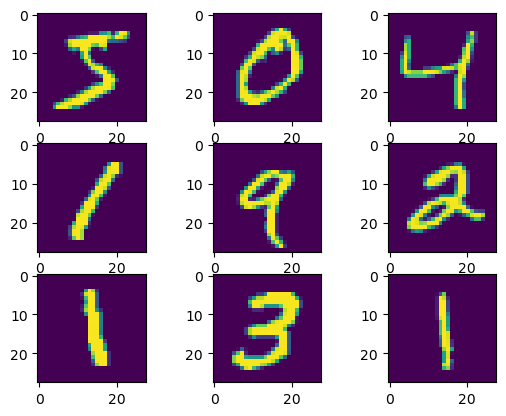

In [5]:
# plotting some handwritten images from data
for i in range(9):
    plt.subplot(331+i)
    plt.imshow(X_train[i])
plt.show()

In [6]:
print("The actual numbers corresponding to the above handwritten digit images are:",y_train[:9])

The actual numbers corresponding to the above handwritten digit images are: [5 0 4 1 9 2 1 3 1]


### Feature enginnering

We will use Neural Network algorithm to recognise the handwritten digits from the provided images. Neural Network is a deep learning algorithm which is a form of **supervised learning**. These deep learning Neural Network estimate the way how neurons work in the human brain.

To get the best accuracy from Neural Network algorithm we need to provide scaled data while training the model.

In [7]:
print("The minimum number of X_train array is: ", X_train.min())
print("The minimum number of X_test array is: ", X_test.min())

The minimum number of X_train array is:  0
The minimum number of X_test array is:  0


In [8]:
print("The maximum number of X_train array is: ", X_train.max())
print("The maximum number of X_test array is: ", X_test.max())

The maximum number of X_train array is:  255
The maximum number of X_test array is:  255


The training dataset array values range from 0 to 255. 

To get best possible results from Neural Network we will scale the data by dividing the arrays with by 255. So, all the values will lie within the interval (0, 1).

In [9]:
X_train = X_train / 255
X_test = X_test / 255

At this stage, we can convert the dataset from **28 x 28** array to one dimensional array to fid into the neural network model. But the function in keras library to neural nextwork has a specific command which flattens the multidimensional array to one dimensional array. So we will move forward without flattenning the array manually.

In [10]:
mn = X_train[0].min()
mx = X_train[0].max()

print("After scaling, the minimum and maximum values in the array are {} and {} respectively.".format(mn,mx))

After scaling, the minimum and maximum values in the array are 0.0 and 1.0 respectively.


### Modeling building

Defining, compiling and fitting the Neural Network model can be done separately into three difefrent parts. 

- While defining the model, we can pass the argument which converts the **28 x 28** areey into one dimensional array. Then we need to pass an argument that defines dense input layer.
- While compiling the model, we need to pass arguments for "optimizer", "loss function" and "metrics". Optimizer optimizes the perfomance of the algorithm, loss function counts the loss from actual observations (lower the loss better the model is), metric stores the accuracy of the model.
- While fitting the model, we need to pass the argument for epochs which takes the integer value from user to run the model that many times.

**For now we will use Neural Network alogorithm without any *hidden layer* and check the performance of the algorithm.**

In [11]:
# Creating neural netword setup
model01 = keras.Sequential([
    # converts the data from 28x28 array to single array
    keras.layers.Flatten(input_shape=(28,28)),
    # input layer
    keras.layers.Dense(10, input_shape = (28*28,), activation = 'sigmoid')
])

# Compile the neural network model
model01.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Fitting the neural network model
model01.fit(X_train, y_train, epochs = 5)



Epoch 1/5


1875/1875 [==============================] - 7s 3ms/step - loss: 0.4677 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3036 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2830 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2735 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2669 - accuracy: 0.9256


After successfully fitting the Neural Network model, we can now evaluate the model to check its performance on test dataset.

In [21]:
# Evaluating model on test dataset
Eval01 = model01.evaluate(X_test, y_test)
score = round(Eval01[1]*100, 2)
print("The Neural Network model correctly identifies the handwritten digits as actual digits with {}% accuracy.".format(score))

313/313 [==============================] - 1s 3ms/step - loss: 0.2661 - accuracy: 0.9256
The Neural Network model correctly identifies the handwritten digits as actual digits with 92.56% accuracy.


### Prediction

In [13]:
y_predicted_01 = model01.predict(X_test)
y_predicted_01[0]

313/313 [==============================] - 1s 3ms/step


array([3.1305693e-02, 2.3038032e-07, 6.8639204e-02, 9.6850437e-01,
       3.2918418e-03, 1.3031511e-01, 1.4962515e-06, 9.9981308e-01,
       9.1469362e-02, 7.1457565e-01], dtype=float32)

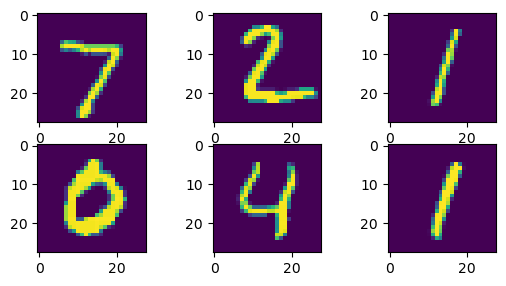

In [14]:
for i in range(6):
    plt.subplot(330+1+i)
    plt.imshow(X_test[i])
plt.show()

The Neural Network prediction gives arrays of scores for each digit from 0 to 9. The digit with highest score is the predicted value. To know exact which digit does it predict from these arrays, we need to extract index corresponding to the maximum score. for this we use **argmax** command from numpy library.

In [15]:
for i in range(6):
    n = np.argmax(y_predicted_01[i])
    s = np.max(y_predicted_01[i])
    print("The digit with highest score {} is {}".format(s, n))

The digit with highest score 0.9998130798339844 is 7
The digit with highest score 0.9995458722114563 is 2
The digit with highest score 0.9921165108680725 is 1
The digit with highest score 0.9996594786643982 is 0
The digit with highest score 0.9904757142066956 is 4
The digit with highest score 0.9966469407081604 is 1


Let us now construct the confusion matrix for actual values versus predicted.

In [16]:
y_predicted_labeled_01 = [np.argmax(x) for x in y_predicted_01]
Confusion_Matrix_01 = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labeled_01)

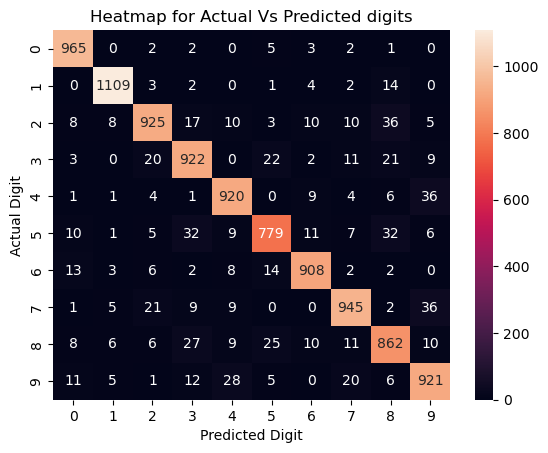

In [17]:
import seaborn as sns
sns.heatmap(Confusion_Matrix_01, annot= True, fmt='d')
plt.xlabel("Predicted Digit")
plt.ylabel("Actual Digit")
plt.title("Heatmap for Actual Vs Predicted digits")
plt.show()

### Observations:

The sum of diagonal elements in the above matrix gives the number of correctly predicted digits, while off-diagonal elements are the incorrectly predicted digits.

Lesser the sum of off-digonal elements better the model is.

### Improving the algorithm

Recall that, we did not use hidden layer while defining the Neural Network. Let us now try using hidden layer and check whether it improves the performance of the Neural Network algorithm.

We will use the same steps of defining, compiling and fitting the Neural Network which we used earlier.

In [18]:
# Creating neural netword setup
model02 = keras.Sequential([
    # converts the data from 28x28 array to single array
    keras.layers.Flatten(input_shape=(28,28)),
    # input layer
    keras.layers.Dense(100, activation = 'sigmoid'),
    # hidden layer
    keras.layers.Dense(10, activation = 'sigmoid')
])

# Compile the neural network model
model02.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Fitting the neural network model
model02.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4207 - accuracy: 0.8933
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2008 - accuracy: 0.9426
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1500 - accuracy: 0.9566
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1186 - accuracy: 0.9660
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0977 - accuracy: 0.9716


In [22]:
# Evaluating model on test dataset
Eval02 = model02.evaluate(X_test, y_test)
new_score = round(Eval02[1]*100, 2)
print("The newly fitted Neural Network model correctly identifies the handwritten digits as actual digits with {}% accuracy.".format(new_score))

313/313 [==============================] - 1s 3ms/step - loss: 0.1042 - accuracy: 0.9692
The newly fitted Neural Network model correctly identifies the handwritten digits as actual digits with 96.92% accuracy.


313/313 [==============================] - 1s 3ms/step


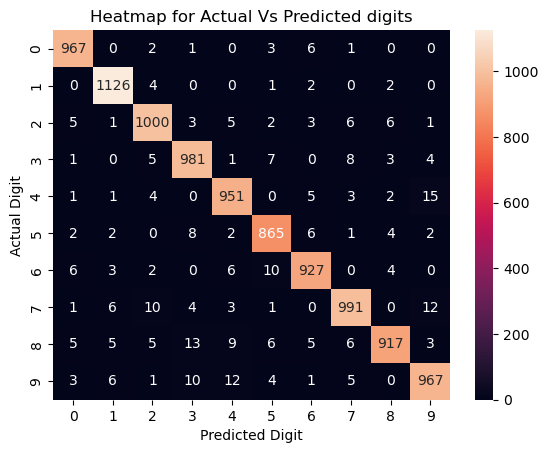

In [20]:
# Prediction
y_predicted_02 = model02.predict(X_test)
y_predicted_02[0]

y_predicted_labeled_02 = [np.argmax(x) for x in y_predicted_02]
Confusion_Matrix_02 = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labeled_02)

import seaborn as sns
sns.heatmap(Confusion_Matrix_02, annot= True, fmt='d')
plt.xlabel("Predicted Digit")
plt.ylabel("Actual Digit")
plt.title("Heatmap for Actual Vs Predicted digits")
plt.show()

### Conclusion:

- Using the hidden layers while defining the Neural Network algorithm, increases the perfomance of the model.
- As the model accurately predicts the digits with high accuracy, we can use this model for Handwritten Digit Recognision.